In [1]:
from sklearn.datasets import make_moons, make_blobs, make_circles
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import numpy as np

%matplotlib inline

In [2]:
def plot_separating_surface(X, y, cls, title=''):
    x_min = np.min(X[:, 0]) - 0.1
    x_max = np.max(X[:, 0]) + 0.1
    y_min = np.min(X[:, 1]) - 0.1
    y_max = np.max(X[:, 1]) + 0.1
    h = min(x_max - x_min, y_max - y_min) / 1000
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(10, 10))
    if title:
        plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=40, cmap=cm_bright)
    Z = Z.reshape(xx.shape)
    plt.xticks(())
    plt.yticks(())
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.3)
    plt.show()

In [3]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)

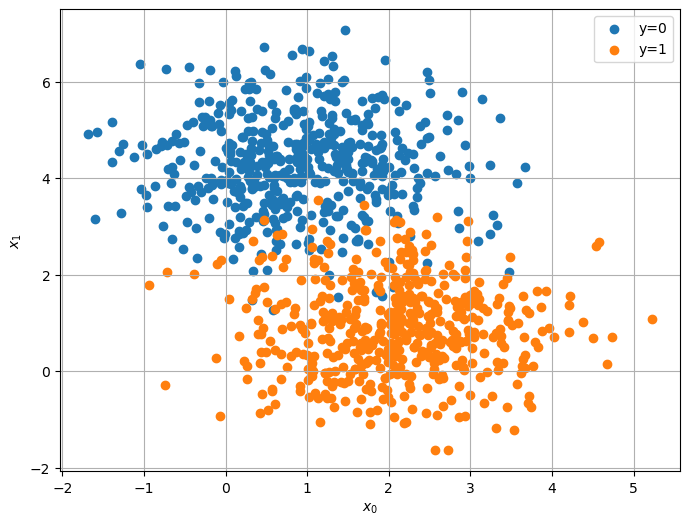

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='y=0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='y=1')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.legend()
plt.grid()

In [8]:
knn = KNeighborsClassifier(n_neighbors=1,
                           weights='uniform',
                           algorithm='auto',
                           metric='minkowski',
                           p=2)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

C:\Users\Sirius\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


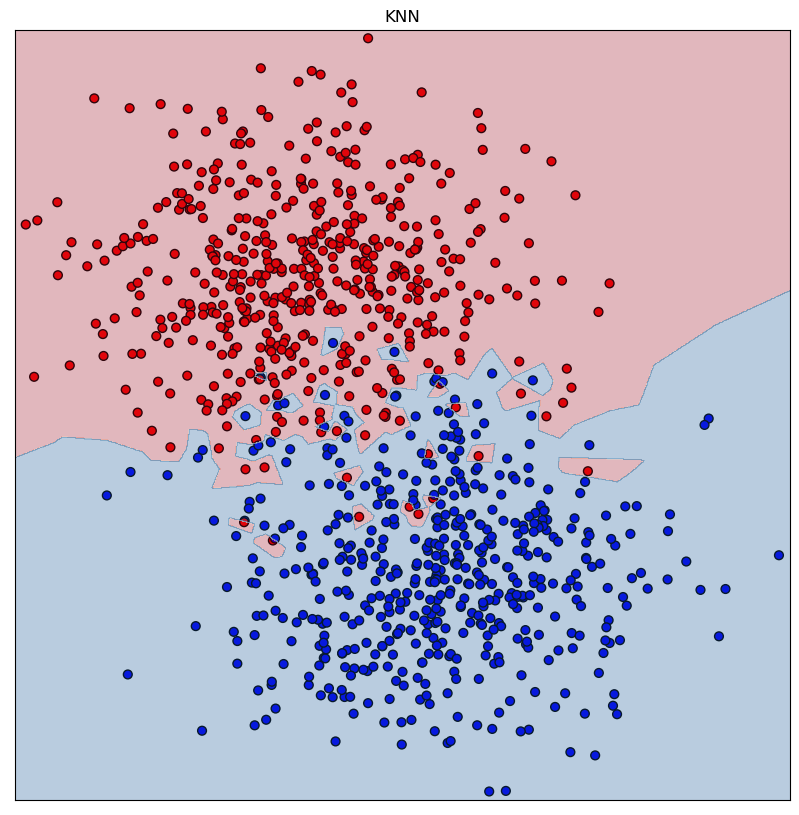

In [9]:
plot_separating_surface(X, y, knn, 'KNN')

In [10]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

In [13]:
data = fetch_20newsgroups()

In [15]:
data['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [16]:
X_train, y_train = fetch_20newsgroups(subset='train',
                                     return_X_y=True,
                                     random_state=42)

X_test, y_test = fetch_20newsgroups(subset='test',
                                     return_X_y=True,
                                     random_state=42)

In [24]:
print(X_train[10])
print(data['target_names'][y_train[27]])

From: irwin@cmptrc.lonestar.org (Irwin Arnstein)
Subject: Re: Recommendation on Duc
Summary: What's it worth?
Distribution: usa
Expires: Sat, 1 May 1993 05:00:00 GMT
Organization: CompuTrac Inc., Richardson TX
Keywords: Ducati, GTS, How much? 
Lines: 13

I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs
very well, paint is the bronze/brown/orange faded out, leaks a bit of oil
and pops out of 1st with hard accel.  The shop will fix trans and oil 
leak.  They sold the bike to the 1 and only owner.  They want $3495, and
I am thinking more like $3K.  Any opinions out there?  Please email me.
Thanks.  It would be a nice stable mate to the Beemer.  Then I'll get
a jap bike and call myself Axis Motors!

-- 
-----------------------------------------------------------------------
"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx
irwin@cmptrc.lonestar.org    DoD #0826          (R75/6)
-------------------------------------------------------------------

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [32]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

In [33]:
vectorizer = CountVectorizer() #stop_words='english', min_df=1, max_df=0.9

In [34]:
vectorizer.fit(corpus)

CountVectorizer()

In [35]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [ ]:
np.array(vectorizer, )

In [36]:
vectorizer.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [37]:
vectorizer = CountVectorizer(stop_words='english', min_df=10, max_df=0.8)

In [38]:
vectorizer.fit(X_train)

CountVectorizer(max_df=0.8, min_df=10, stop_words='english')

In [39]:
count_X_train = vectorizer.transform(X_train)

In [41]:
count_X_train.shape

(11314, 15288)

In [45]:
knn_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='uniform')

In [46]:
knn_clf.fit(count_X_train, y_train)

KNeighborsClassifier()

In [47]:
count_X_test = vectorizer.transform(X_test)

In [49]:
y_pred = knn_clf.predict(count_X_test)

C:\Users\Sirius\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [51]:
(y_pred == y_test).sum() / len(y_test)

0.37174721189591076

In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Predict label')

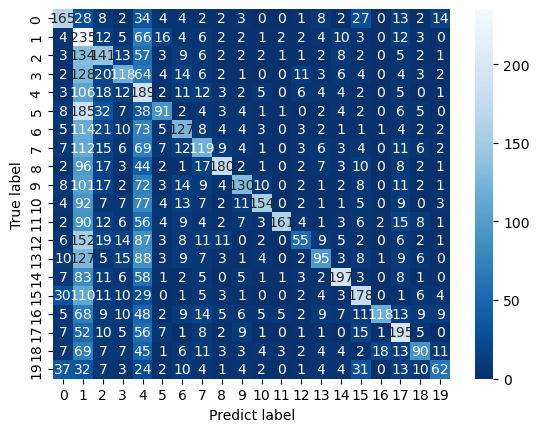

In [55]:
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predict label')

In [56]:
from sklearn.model_selection import Pipline

ImportError: cannot import name 'Pipline' from 'sklearn.model_selection' (C:\Users\Sirius\anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)